In [2]:
import sys
import os
module_dir = os.path.abspath("/lustrehome/federicacuna/TB_Sept_2023_ml/Code/Pytorch_gnn/")
sys.path.append(module_dir)

In [10]:
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np 
from torch_geometric.loader import DataLoader
import os
from torch_geometric.nn import Sequential, GCNConv,GATConv
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time
import MyData as data
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression


from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
import GNN_model

In [5]:
num_ly=3
num_to_reduce=64
sel_alg=3
lr=5e-5
view='xz'
n_epochs=1500
folder_pkl='optimized'

In [4]:
if "." in str(lr):
    lr_name = str(lr).replace(".", "_")
    print(lr_name)
else:
    lr_name = str(lr)
    print(lr_name)

0_001


In [5]:
hidden_size = num_to_reduce*num_ly

In [6]:
# %%time
# data=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed/')
# if view=='xz':
#     fname='pi-_10GeV_4ly_1e-4_inclined_viewx'
# else:
#     fname='pi-_10GeV_4ly_1e-4_inclined_viewy'
# data_trk=data.get_more_file(0,2,fname)
# train_dataset = data_trk
# val_dataset =data.get_more_file(2,3,fname)
# test_dataset =data.get(4,fname)
# print('len_train_dataset ',len(train_dataset))
# print('len_val_dataset ',len(val_dataset))
# print('len_test_dataset ',len(test_dataset))

taking a list of file from  0  to  2
taking a list of file from  2  to  3
taking the  data_4.pt
len_train_dataset  18604
len_val_dataset  9318
len_test_dataset  9323
CPU times: user 5.61 s, sys: 341 ms, total: 5.95 s
Wall time: 5.94 s


In [11]:
# %%time
# data=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed/')
# if view=='xz':
#     fname='pi-_10GeV_4ly_1e-4_inclined_viewx'
# else:
#     fname='pi-_10GeV_4ly_1e-4_inclined_viewy'
# data_trk=data.get_more_file(0,450,fname)
# train_dataset = data_trk[:4000000]
# val_dataset =data.get_more_file(500,610,fname)[:800000]
# test_dataset =data.get(700,fname)
# print('len_train_dataset ',len(train_dataset))
# print('len_val_dataset ',len(val_dataset))
# print('len_test_dataset ',len(test_dataset))

file 31 not found
file 81 not found
file 150 not found
file 304 not found
file 439 not found
taking a list of file from  0  to  450
file 567 not found
taking a list of file from  500  to  610
taking the  data_700.pt
len_train_dataset  4000000
len_val_dataset  800000
len_test_dataset  9333
CPU times: user 18min 26s, sys: 56.2 s, total: 19min 22s
Wall time: 28min 1s


In [ ]:
data=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed/')
if view=='xz':
    fname='pi-_10GeV_4ly_1e-4_inclined_NEW_viewx'
else:
    fname='pi-_10GeV_4ly_1e-4_inclined_NEW_viewy'
data_trk=data.get_more_file(0,300,fname)
train_dataset = data_trk[:2000000]
val_dataset =data.get_more_file(300,400,fname)[:400000]
test_dataset =data.get(500,fname)
print('len_train_dataset ',len(train_dataset))
print('len_val_dataset ',len(val_dataset))
print('len_test_dataset ',len(test_dataset))

In [7]:
%%time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device=torch.device('cpu')
print('Using device:', device)
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')


Using device: cuda
NVIDIA A100-PCIE-40GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
CPU times: user 2.58 ms, sys: 41 ms, total: 43.6 ms
Wall time: 50.6 ms


In [8]:
%%time
NUM_FEATURES = train_dataset[0].x.shape[1]
print(NUM_FEATURES)
NUM_CLASSES =1
n_ly=4
model_list=['SageConv','SageConv2','GCN','GCN_2','GAT']

5
CPU times: user 62 µs, sys: 0 ns, total: 62 µs
Wall time: 65.3 µs


In [10]:
outname=f'best_model{model_list[sel_alg]}_lytrk{n_ly}_view_{view}_lr_{lr_name}_nepochs_{n_epochs}_lentrain_{len(train_dataset)}.pkl'

In [11]:
if sel_alg>len(model_list):
    print('no algorithm available')
if sel_alg==0:
    model = GNN_model.SageConv(num_feat=NUM_FEATURES,num_class=NUM_CLASSES)
elif sel_alg==1:
    model = GNN_model.SageConv2(num_feat=NUM_FEATURES,num_class=NUM_CLASSES)
elif sel_alg==2:
    model = GNN_model.GCN(num_feat=NUM_FEATURES, num_class=NUM_CLASSES,num_to_reduce=64)
elif sel_alg==3:
    model = GNN_model.GCN_2(hidden_size=hidden_size, num_ly=num_ly, num_feat=NUM_FEATURES, num_class=NUM_CLASSES,num_to_reduce=64)
elif sel_alg==4:
    model = GNN_model.GAT(num_feat=NUM_FEATURES, num_class=NUM_CLASSES)

In [12]:
print(model)

GCN_2(
  (conv_layers): ModuleList(
    (0): GCNConv(5, 192)
    (1): GCNConv(192, 128)
    (2): GCNConv(128, 64)
    (3): GCNConv(64, 1)
  )
)


In [13]:
%%time
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
####criterion = torch.nn.CrossEntropyLoss()
criterion=torch.nn.functional.binary_cross_entropy#for sageconv

def train_model(train_data):
    model.to(device)
    model.train()
    for data in train_data:
        data.to(device)
        out = model(data) # Perform a single forward pass.
        labels=data.y.float().to(device)
        loss = criterion(out.squeeze(1).float(), labels)  # Compute the loss.
        
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.
    return model.to(device)

threshold=0.8
def evaluate_model(model,test_data):
    model.eval()
    correct = 0
    total_samples = 0
    model_outputs = []
    targets = []
    pred_class=[]

    for data in test_data:
        data.to(device)
        model_output = model(data)
        model_output.to(device)
        predicted_class = torch.where(model_output > threshold, 1, 0)
        
        correct += int((predicted_class == data.y.float()).sum())
        total_samples += len(data.y)

          # store these to get the loss
        model_outputs.extend(model_output.tolist())
        targets.extend(data.y.float().tolist())
        pred_class.extend(predicted_class.tolist())

    
    loss = criterion(torch.tensor(model_outputs).squeeze(1), torch.tensor(targets).float())
    accuracy = accuracy_score(targets, pred_class)
    precision = precision_score(targets, pred_class)
    recall = recall_score(targets, pred_class)
    
    return accuracy, loss, recall, precision 


CPU times: user 8.64 ms, sys: 236 ms, total: 244 ms
Wall time: 266 ms


In [14]:
## %%time
train_loader = DataLoader(train_dataset, batch_size=4032,shuffle=True,pin_memory=True,num_workers=15,drop_last=True) 
val_loader=DataLoader(val_dataset, batch_size=128,shuffle=True,pin_memory=True,num_workers=15,drop_last=True) 
test_loader=DataLoader(test_dataset, batch_size=64,shuffle=True,drop_last=True)

In [15]:
%%time
train_accuracies = []
validation_accuracies = []
validation_losses = []
train_losses = []

val_recall=[]
val_precision=[]
train_recall=[]
train_precision=[]
times = []

for epoch in range(1, n_epochs):
    start = time.time()
    print(epoch)
    model = train_model(train_loader)
    print(next(model.parameters()).is_cuda)
    
    train_acc, train_loss, train_rec, train_prec = evaluate_model(model,train_loader)
    train_losses.append(train_loss)
                   
    val_acc, val_loss, val_rec, val_prec = evaluate_model(model,val_loader)
    validation_losses.append(val_loss)

    train_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
    
    train_precision.append(train_prec)
    train_recall.append(train_rec)
    
    val_precision.append(val_prec)
    val_recall.append(val_rec)

    # save the model if it is the better than any previous ones
    if val_loss.item() <= min(validation_losses).item():
        torch.save(model, f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_pkl/{folder_pkl}/{outname}')
        print(f'Epoch_stop: {epoch}')
          
    #torch.save(model, "best_model.pkl")
    if epoch % 1 == 0:
        print(f'Epoch: {epoch}, Train Acc: {train_acc:.4f}, Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}, time :{time.time() - start}')
    times.append(time.time() - start)
  

1
True
Epoch_stop: 1
Epoch: 1, Train Acc: 0.6066, Train Loss: 0.6811, Val Acc: 0.6038, Val Loss: 0.6807, time :4.498075723648071
CPU times: user 2.48 s, sys: 1.85 s, total: 4.33 s
Wall time: 4.5 s


In [17]:
best_validation_loss = min(validation_losses)
best_epoch = validation_losses.index(best_validation_loss)
accuracy_at_best_epoch = validation_accuracies[best_epoch]
recall_at_best_epoch=val_recall[best_epoch]
precision_at_best_epoch=val_precision[best_epoch]
print(f"The best result was achieved after {best_epoch} epochs with a validation accuracy of {accuracy_at_best_epoch:.4f} and a loss of {best_validation_loss:.4f}")
print(f"The validation recall is {recall_at_best_epoch:.4f} and the precision is {precision_at_best_epoch:.4f}")

The best result was achieved after 0 epochs with a validation accuracy of 0.6038 and a loss of 0.6807
The validation recall is 0.6579 and the precision is 0.7319


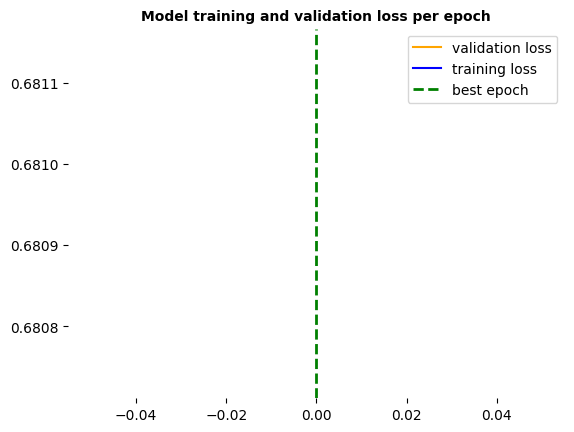

In [18]:
fig, ax = plt.subplots()
#fig.set_size_inches(30.5, 15.5)

plt.plot(validation_losses,color='orange',label='validation loss')
plt.plot(train_losses,color='blue',label='training loss')

plt.axvline(x=best_epoch, color="green", linewidth=2, linestyle='dashed',label='best epoch')
#plt.legend(['Val Loss', 'Train Loss', "Best Epoch"])
plt.legend()


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Model training and validation loss per epoch", fontsize=10, fontweight='bold')
#plt.ylim(0.05,0.2)
plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img/{folder_pkl}/model_loss_{model_list[sel_alg]}_view_{view}_lr_{lr_name}_numly_{num_ly}.png')
plt.show()

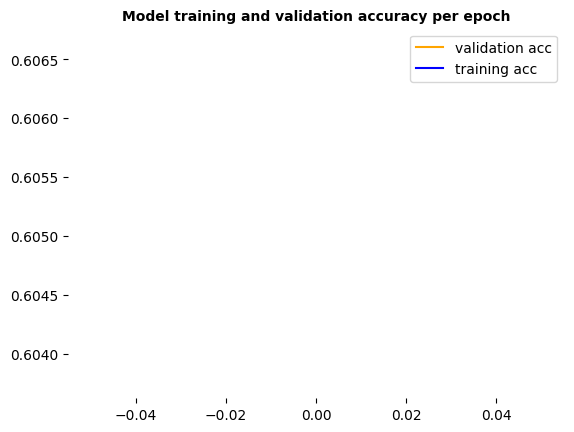

In [19]:
fig, ax = plt.subplots()
#fig.set_size_inches(30.5, 15.5)

plt.plot(validation_accuracies,color='orange',label='validation acc')
plt.plot(train_accuracies,color='blue',label='training acc')

plt.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Model training and validation accuracy per epoch", fontsize=10, fontweight='bold')
# plt.ylim(0.9,1)
plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img/{folder_pkl}/model_acc_{model_list[sel_alg]}_view_{view}_lr_{lr_name}_numly_{num_ly}.png')
plt.show()

In [20]:
best_model = torch.load( f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_pkl/{folder_pkl}/{outname}')
best_model.to(device) 

correct = 0
total_samples = 0
pred_test_cl=[]
targets=[]
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)  
        model_output = best_model(data)
        predicted_class =  torch.where(model_output > 0.8, 1, 0)
        pred_test_cl.extend(predicted_class.tolist())
        correct += int((predicted_class == data.y).sum())
        targets.extend(data.y.tolist())
        total_samples += data.y.size(0)

print('accuracy ',accuracy_score(targets,pred_test_cl),' recall ', recall_score(targets,pred_test_cl),' precision ',precision_score(targets,pred_test_cl))


accuracy  0.6074331953330824  recall  0.658145473516571  precision  0.7402408894379247
